# "Dot Regularity"
> "This blog investigates a recent paper on dot regularity and sets up explorations toward implementing this in our own work."

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [fastpages, jupyter]
- hide: true
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

#Dot Regularity

Dry, Preiss, and Wagemans investigate a theretofore little researched subset within the NP-complete Travelling Salesman/Minimum Spanning Tree problems. We find that this research has potential consequences for investigating a reduction in unwanted image corruption.

###Travelling Salesman
A Hamiltonian Cycle is a complete path starting and ending at the same vertex that visits every vertex in the graph precisely once each. The Travelling Salesman Problem (TSP) builds on this definition by specifying that a solution will minimize the pathway through vertices.

###Minimum Spanning Tree
A minimum spanning tree is an interconnected set of vertices without a path condition.

###NP-Complete
Both the TSP and MST problems are considered NP-Complete, which is a category of algorithmic problems that cannot be solved in polynomial time but whose solutions *can be verified* in polynomial time. The NP-complete set of problems represent a highly studied and sought after field to solve algorithmically, but this paper demonstrates that humans can intuitively produce near-optimal solutions in a near-linear relative to problem size fashion.

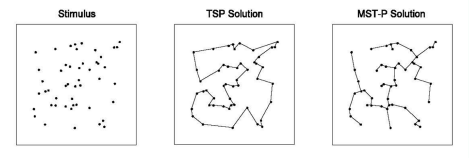

Previous research within the field suggests that for human solvers, solving a TSP forces similar logic to MST. This paper's hypothesis focuses on experimenting on both tasks with the same stimulus set by tweaking variables relating to the spatial distribution of TSP and MST stimuli. 

In other words - does clustering/regularity on a dot graph affect human ability to generate a close match to optimal TSP or MST graph?

The results of the experiment presented in the paper suggest that human solutions to TSP and MST are indeed affected by the spatial distribution of stimuli. Performance progressively degrates as the graph shifts from highly clustered to random to highly regular graphs. The authors note that there were differences between TSP and MST solutions, characterized by higher variability in TSP than MST. This was an expected outcome, since TSP are generally considered more computationally complex than MST. However, they note that human time complexity did not show significant differences.

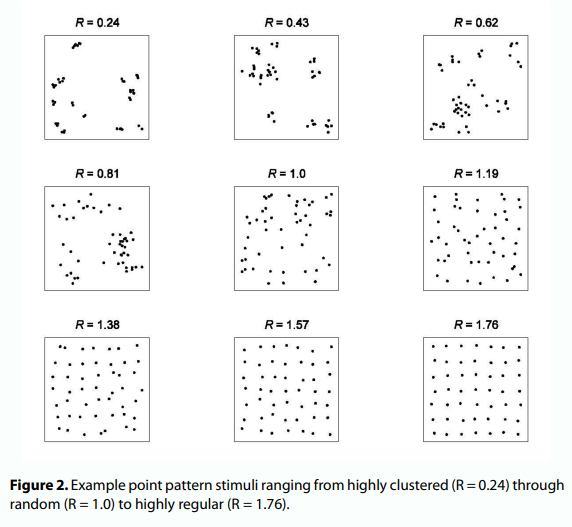

###Repercussions for our research
Human solving efficiency aside, we wish to investigate if the cluster-random-regular continuum formula can play a role in establishing a quantitative link between graph regularity and acceptable image results in a similar fashion to SSIM and STD.

The nearest neighbor statistic R gives a summary of the spacing between stimulus elements. Since the average nearest neighbor distance decreases with tigher clutering, R will likewise shrink. Conversely, the closer to 2.149 R becomes, the greater the uniformity spacing.

R is given by:
$R=\frac{r_0}{r_E}$
where $r_0$ is the observed mean nearest neighbor distance:
For a set of n points where the distance between point $i$ and point $j$ is $u_{ij}$,
$r_0=\frac{1}{n}\sum_{1\neq j}^{n} min(u_{ij})$

And $r_E=.5 \sqrt{\frac{A}{N}}$

It is heretofore unknown if this score is significant for our purposes, so further research will investigate establishing correlation.

Christian from Scipython discusses how a set of points drawn from a uniform distribution often display clustering as in the graph below. Run through the nearest neighbor algorithm, we derive an R-score of 0.500005, indicating a moderate-severe clustering. It should be noted that this calculation is extremely computationally expensive, and scales rapidly with the number of points on the graph.

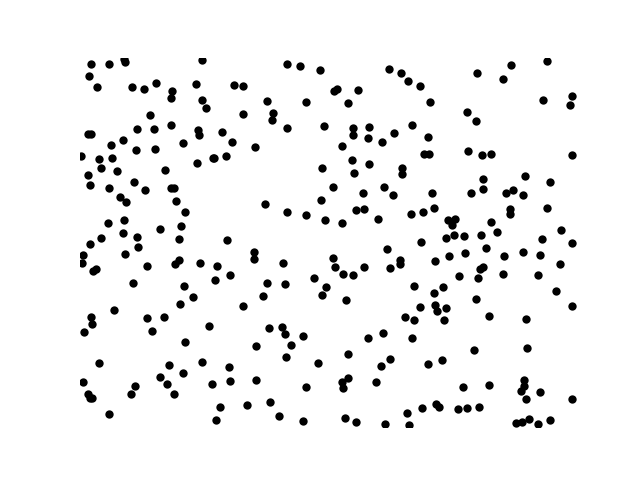

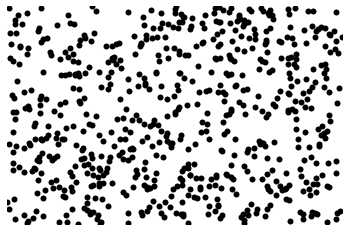

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import Util
width, height = 40, 30
N = math.floor(width * height / 4)
xArr = np.random.uniform(0,width,N)
yArr = np.random.uniform(0,height,N)
arr = np.array([[x,y] for x in xArr for y in yArr]) 
plt.scatter(xArr, yArr,
            c='black', alpha=1, lw=0)
plt.xlim(0,width)
plt.ylim(0,height)
plt.axis('off')
plt.show()

print(arr)
print(Util.calcRegularity(arr, width*height))

Better uniform random phraphs can be achieved by use of Bridson's algorithm, which yields the below image with an R-score of 1.77292. It should be noted that this calculation was extremely quick, suggesting lower computational complexity. Further experiments can be run to prove this correlation.

https://scikit-learn.org/stable/modules/neighbors.html

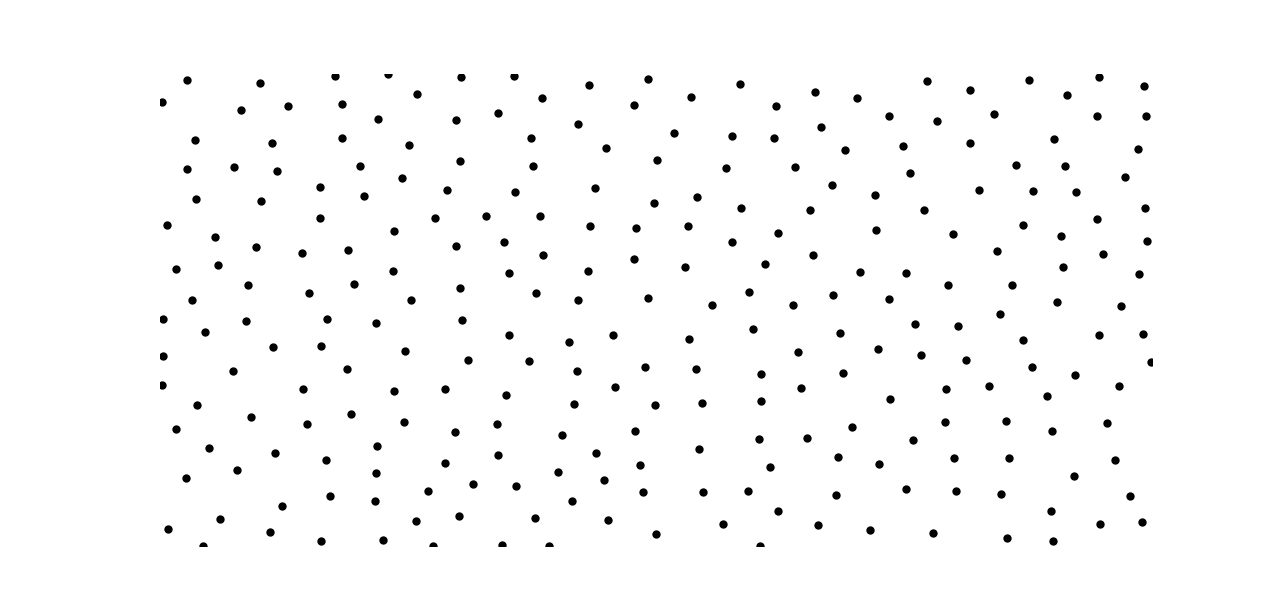

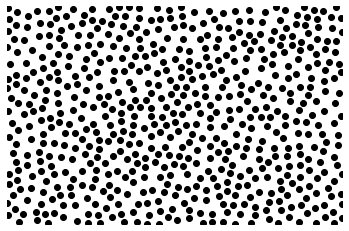

In [ ]:
# https://scipython.com/blog/poisson-disc-sampling-in-python/#comments

import numpy as np
import matplotlib.pyplot as plt

# Choose up to k points around each reference point as candidates for a new
# sample point
k = 30

# Minimum distance between samples
r = 1.7

width, height = 60, 45

# Cell side length
a = r/np.sqrt(2)
# Number of cells in the x- and y-directions of the grid
nx, ny = int(width / a) + 1, int(height / a) + 1

# A list of coordinates in the grid of cells
coords_list = [(ix, iy) for ix in range(nx) for iy in range(ny)]
# Initilalize the dictionary of cells: each key is a cell's coordinates, the
# corresponding value is the index of that cell's point's coordinates in the
# samples list (or None if the cell is empty).
cells = {coords: None for coords in coords_list}

def get_cell_coords(pt):
    """Get the coordinates of the cell that pt = (x,y) falls in."""

    return int(pt[0] // a), int(pt[1] // a)

def get_neighbours(coords):
    """Return the indexes of points in cells neighbouring cell at coords.

    For the cell at coords = (x,y), return the indexes of points in the cells
    with neighbouring coordinates illustrated below: ie those cells that could 
    contain points closer than r.

                                     ooo
                                    ooooo
                                    ooXoo
                                    ooooo
                                     ooo

    """

    dxdy = [(-1,-2),(0,-2),(1,-2),(-2,-1),(-1,-1),(0,-1),(1,-1),(2,-1),
            (-2,0),(-1,0),(1,0),(2,0),(-2,1),(-1,1),(0,1),(1,1),(2,1),
            (-1,2),(0,2),(1,2),(0,0)]
    neighbours = []
    for dx, dy in dxdy:
        neighbour_coords = coords[0] + dx, coords[1] + dy
        if not (0 <= neighbour_coords[0] < nx and
                0 <= neighbour_coords[1] < ny):
            # We're off the grid: no neighbours here.
            continue
        neighbour_cell = cells[neighbour_coords]
        if neighbour_cell is not None:
            # This cell is occupied: store this index of the contained point.
            neighbours.append(neighbour_cell)
    return neighbours

def point_valid(pt):
    """Is pt a valid point to emit as a sample?

    It must be no closer than r from any other point: check the cells in its
    immediate neighbourhood.

    """

    cell_coords = get_cell_coords(pt)
    for idx in get_neighbours(cell_coords):
        nearby_pt = samples[idx]
        # Squared distance between or candidate point, pt, and this nearby_pt.
        distance2 = (nearby_pt[0]-pt[0])**2 + (nearby_pt[1]-pt[1])**2
        if distance2 < r**2:
            # The points are too close, so pt is not a candidate.
            return False
    # All points tested: if we're here, pt is valid
    return True

def get_point(k, refpt):
    """Try to find a candidate point relative to refpt to emit in the sample.

    We draw up to k points from the annulus of inner radius r, outer radius 2r
    around the reference point, refpt. If none of them are suitable (because
    they're too close to existing points in the sample), return False.
    Otherwise, return the pt.

    """
    i = 0
    while i < k:
        rho, theta = np.random.uniform(r, 2*r), np.random.uniform(0, 2*np.pi)
        pt = refpt[0] + rho*np.cos(theta), refpt[1] + rho*np.sin(theta)
        if not (0 <= pt[0] < width and 0 <= pt[1] < height):
            # This point falls outside the domain, so try again.
            continue
        if point_valid(pt):
            return pt
        i += 1
    # We failed to find a suitable point in the vicinity of refpt.
    return False

# Pick a random point to start with.
pt = (np.random.uniform(0, width), np.random.uniform(0, height))
samples = [pt]
# Our first sample is indexed at 0 in the samples list...
cells[get_cell_coords(pt)] = 0
# ... and it is active, in the sense that we're going to look for more points
# in its neighbourhood.
active = [0]

nsamples = 1
# As long as there are points in the active list, keep trying to find samples.
while active:
    # choose a random "reference" point from the active list.
    idx = np.random.choice(active)
    refpt = samples[idx]
    # Try to pick a new point relative to the reference point.
    pt = get_point(k, refpt)
    if pt:
        # Point pt is valid: add it to the samples list and mark it as active
        samples.append(pt)
        nsamples += 1
        active.append(len(samples)-1)
        cells[get_cell_coords(pt)] = len(samples) - 1
    else:
        # We had to give up looking for valid points near refpt, so remove it
        # from the list of "active" points.
        active.remove(idx)

plt.scatter(*zip(*samples), color='black', alpha=1, lw=0)
plt.xlim(0, width)
plt.ylim(0, height)
plt.axis('off')
plt.show()


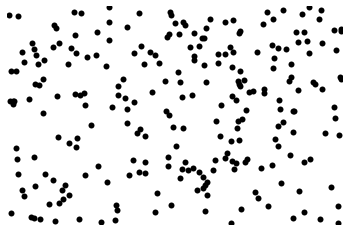

R Score is :  0.5243333123791951
total # of points :  62500


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
# calculate R-Score
def calcRegularity(dots_arr, area):
    """
    :param X: array of dots
    :return: R<1: highly clustered, R=1: highly random, 2>R>1: regular
    """
    n = dots_arr.shape[0]
    if n <= 1:
        return 4.44
    nbrs = NearestNeighbors(n_neighbors=2, algorithm='brute').fit(dots_arr)
    distances, indices = nbrs.kneighbors(dots_arr)
    r0 = (1 / n) * np.sum(distances, axis=0)[1]
    area = area  # to use 1mm box
    density = n / area
    rE = 0.5 * np.sqrt((area / n))
    R = r0 / rE

    return R


width, height = 40, 25
N = math.floor(width * height / 4)
xArr = np.random.uniform(0,width,N)
yArr = np.random.uniform(0,height,N)
arr = [[x,y] for x in xArr for y in yArr]
arr = np.array(arr)
plt.scatter(xArr, yArr,
            c='black', alpha=1, lw=0)
plt.xlim(0,width)
plt.ylim(0,height)
plt.axis('off')
plt.show()

# print(arr)
print('R Score is : ', calcRegularity(arr, width*height))
print('total # of points : ', len(arr))
# print(len(x))
# print(len(y))

## Clusters
https://stackoverflow.com/questions/47115025/using-python-to-generate-clusters-of-data